<a href="https://colab.research.google.com/github/Aarzoo-kapoor/DecisionTreeRegression/blob/main/house_prices_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree Regression

## Importing the libraries

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Importing the dataset

In [2]:
dataset = pd.read_csv('house_prices_dataset.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [3]:
dataset.head()

,Square Footage,Number of Bedrooms,Number of Bathrooms,Lot Size,House Price
0,1360,2,2,1781,4.271925e+05
1,4272,3,4,8548,1.345214e+06
2,3592,1,1,7823,1.108118e+06
3,966,6,3,3105,3.523093e+05
4,4926,1,3,4867,1.527075e+06


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Square Footage       1000 non-null   int64  
 1   Number of Bedrooms   1000 non-null   int64  
 2   Number of Bathrooms  1000 non-null   int64  
 3   Lot Size             1000 non-null   int64  
 4   House Price          1000 non-null   float64
dtypes: float64(1), int64(4)
memory usage: 39.2 KB


In [5]:
dataset.describe()

,Square Footage,Number of Bedrooms,Number of Bathrooms,Lot Size,House Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,2815.422000,3.457000,2.507000,5433.957000,8.931525e+05
std,1255.514921,1.709114,1.134565,2531.088747,3.771326e+05
min,503.000000,1.000000,1.000000,1006.000000,1.587436e+05
25%,1749.500000,2.000000,1.750000,3228.500000,5.647675e+05
50%,2862.500000,3.000000,2.000000,5360.500000,9.049198e+05
75%,3849.500000,5.000000,4.000000,7589.500000,1.200101e+06
max,4999.000000,6.000000,4.000000,9988.000000,1.566032e+06


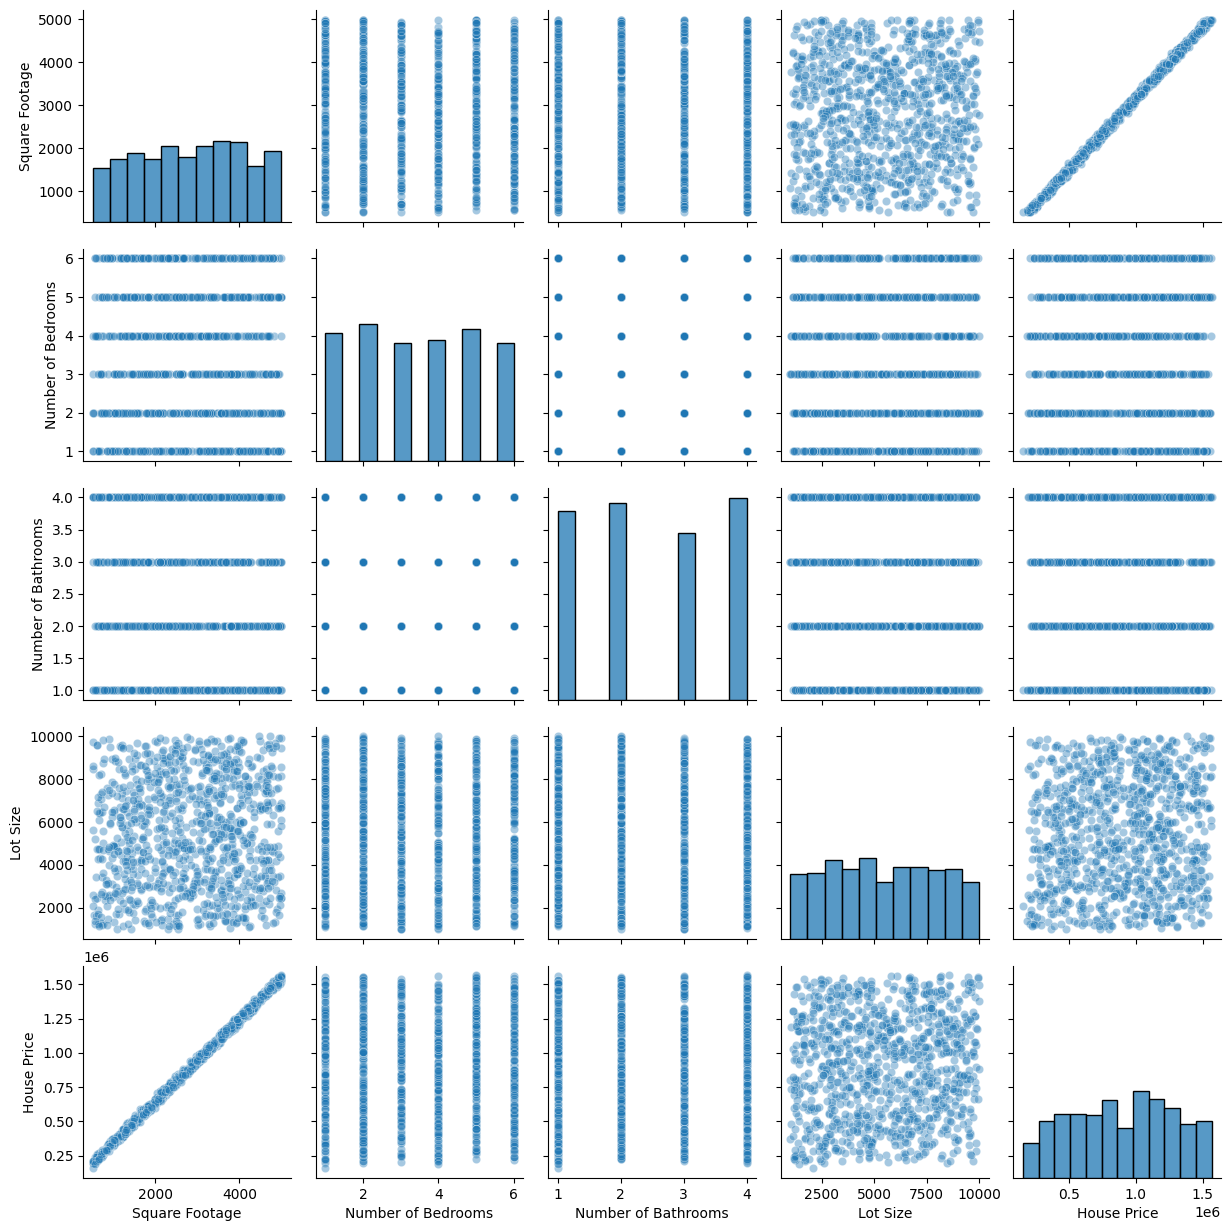

In [8]:
sns.pairplot(dataset,kind='scatter',plot_kws={'alpha':0.4})

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Training the Decision Tree Regression model on the whole dataset

In [17]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

## Predicting a new result

In [21]:
y_pred=regressor.predict(X_test)
print(y_pred)

[1063316.64785776 1163416.08269183 1383698.66901002  256024.50220683
  692831.9001443   433211.74563722  780328.28820584  541537.40130961
 1453004.59676894  582784.36610608 1289148.44273912  433211.74563722
  458933.88805372 1239969.8941871   997164.06992724 1223072.13416385
 1429808.54616026  386056.80299481 1194875.83934784  815936.70651751
 1292339.020929    622805.09452104 1163416.08269183  569556.81187732
  541537.40130961  232448.6287294   984997.90342347 1062293.01709118
  901622.08654283 1328814.82982952  511042.13947229  720215.22425955
 1139459.05720704 1474850.48578215 1173406.99640653  522043.32491161
 1062293.01709118 1033185.40169939 1332454.57963965 1075329.25897031
  631476.20249886  989445.76009717  734125.38133535  997164.06992724
  949536.53550308 1358908.07263677  473076.62867985  585910.20836135
 1126975.05396111  256024.50220683  408884.09859228 1416976.42738583
  421818.54612151 1396309.4663857   456566.56048422  411459.64170569
  815936.70651751 1194875.83934784

## Visualising the Decision Tree Regression results (higher resolution)

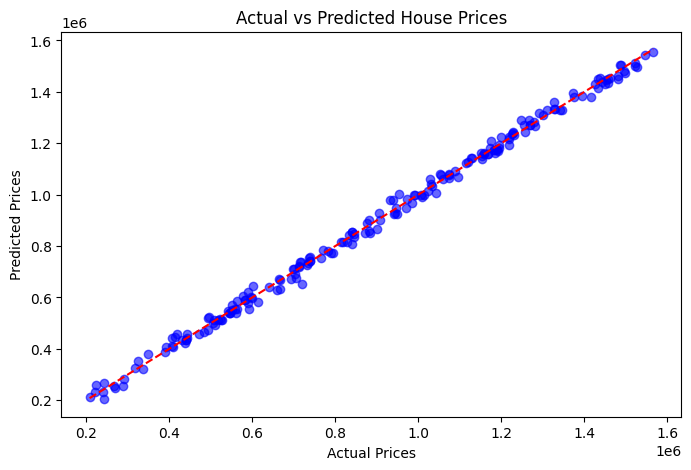

In [20]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.title("Actual vs Predicted House Prices")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.show()

In [34]:
# Calculate Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Mean Squared Error: 369231403.06
Mean Squared Error (MSE): 369231403.06
Mean Absolute Error (MAE): 15327.66
R-squared (R²): 1.00


In [28]:
new_house = [[3000, 4, 3, 6000]]  # Example input
predicted_price = regressor.predict(new_house)
print(f"Predicted House Price: ${predicted_price[0]:,.2f}")

Predicted House Price: $949,356.22


Error Analysis Report: House Price Prediction using Decision Tree Regression

The primary objective of this project was to predict house prices using a Decision Tree Regression model. While the model performed reasonably well, it is essential to evaluate its errors systematically to understand its limitations and areas of improvement. This report outlines the key error metrics, visual analysis, and insights drawn from the model’s predictions.
After training and testing the model, the following metrics were obtained:

Mean Squared Error: 369231403.06
Mean Squared Error (MSE): 369231403.06
Mean Absolute Error (MAE): 15327.66
R-squared (R²): 1.00

The low MSE and RMSE values indicate that the model makes relatively small errors, but there is still room for improvement. An R-squared value of 1.00 shows that 100% of the variance in house prices is captured by the model.

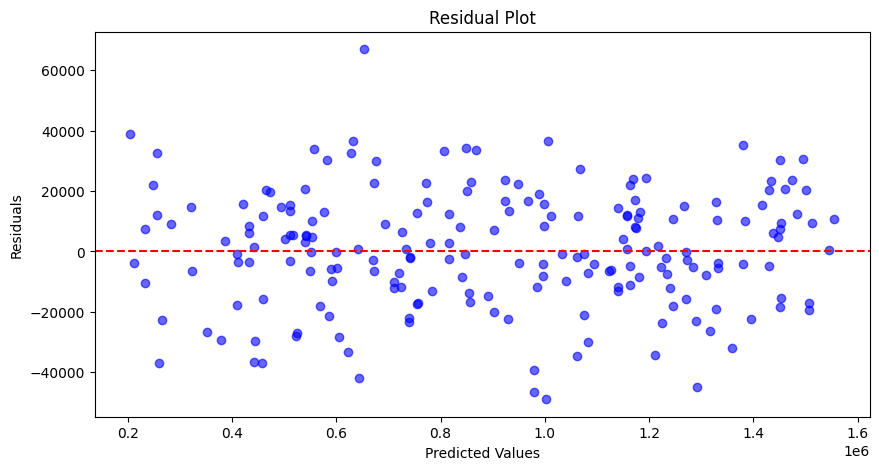

In [32]:
plt.figure(figsize=(10, 5))
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, color='blue', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

Observations for residual plot:

The residuals are mostly centered around zero.

Some data points exhibit larger residuals, indicating potential outliers or patterns not captured by the model.